In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pickle
import gzip
%matplotlib inline

In [2]:
apple_stk=pd.read_csv("AAPL.csv")

In [3]:
apple_stk

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2012,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,04-01-2012,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,05-01-2012,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,06-01-2012,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,09-01-2012,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,23-12-2019,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,24-12-2019,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,26-12-2019,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,27-12-2019,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


In [5]:
train, test = apple_stk.iloc[:-30, -2], apple_stk.iloc[-30:, -2]
len(train), len(test)

(1981, 30)

In [6]:
sarima = SARIMAX(train, order=(2, 1, 0), seasonal_order=(2, 1, 0, 21)).fit()
pred_train = sarima.predict(start=train.index[0], end=train.index[-1])
pred_test = sarima.predict(start=test.index[0], end=test.index[-1])

In [7]:
sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Adj Close   No. Observations:                 1981
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 21)   Log Likelihood               -4399.012
Date:                            Thu, 01 Jun 2023   AIC                           8808.024
Time:                                    11:32:13   BIC                           8835.925
Sample:                                         0   HQIC                          8818.279
                                           - 1981                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0157      0.016      0.979      0.328      -0.016       0.047
ar.L2         -0.0602      0.016     -3.783      0.000      -0.091      -0.029
ar.S.L21      -0.6635      0.015    -45.024      0.000      -0.692      -0.635
ar.S.L42      -0.3321      0.014    -23.172      0.000      -0.360      -0.304
sigma2         5.1947      0.084     62.123      0.000       5.031       5.359
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3014.55
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               5.90   Skew:                            -0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
train_rmse = mean_squared_error(train, pred_train)**0.5
test_rmse = mean_squared_error(test, pred_test)**0.5
print(f'Train RMSE = {train_rmse:.4f}')
print(f'Test RMSE = {test_rmse:.4f}')

Train RMSE = 2.6040
Test RMSE = 5.8946


In [10]:
sns.set(rc={'figure.figsize':(15, 6), 'figure.titlesize': 18,'figure.dpi': 150, 'font.size': 16, 'xtick.labelsize': 13, 'ytick.labelsize': 13})

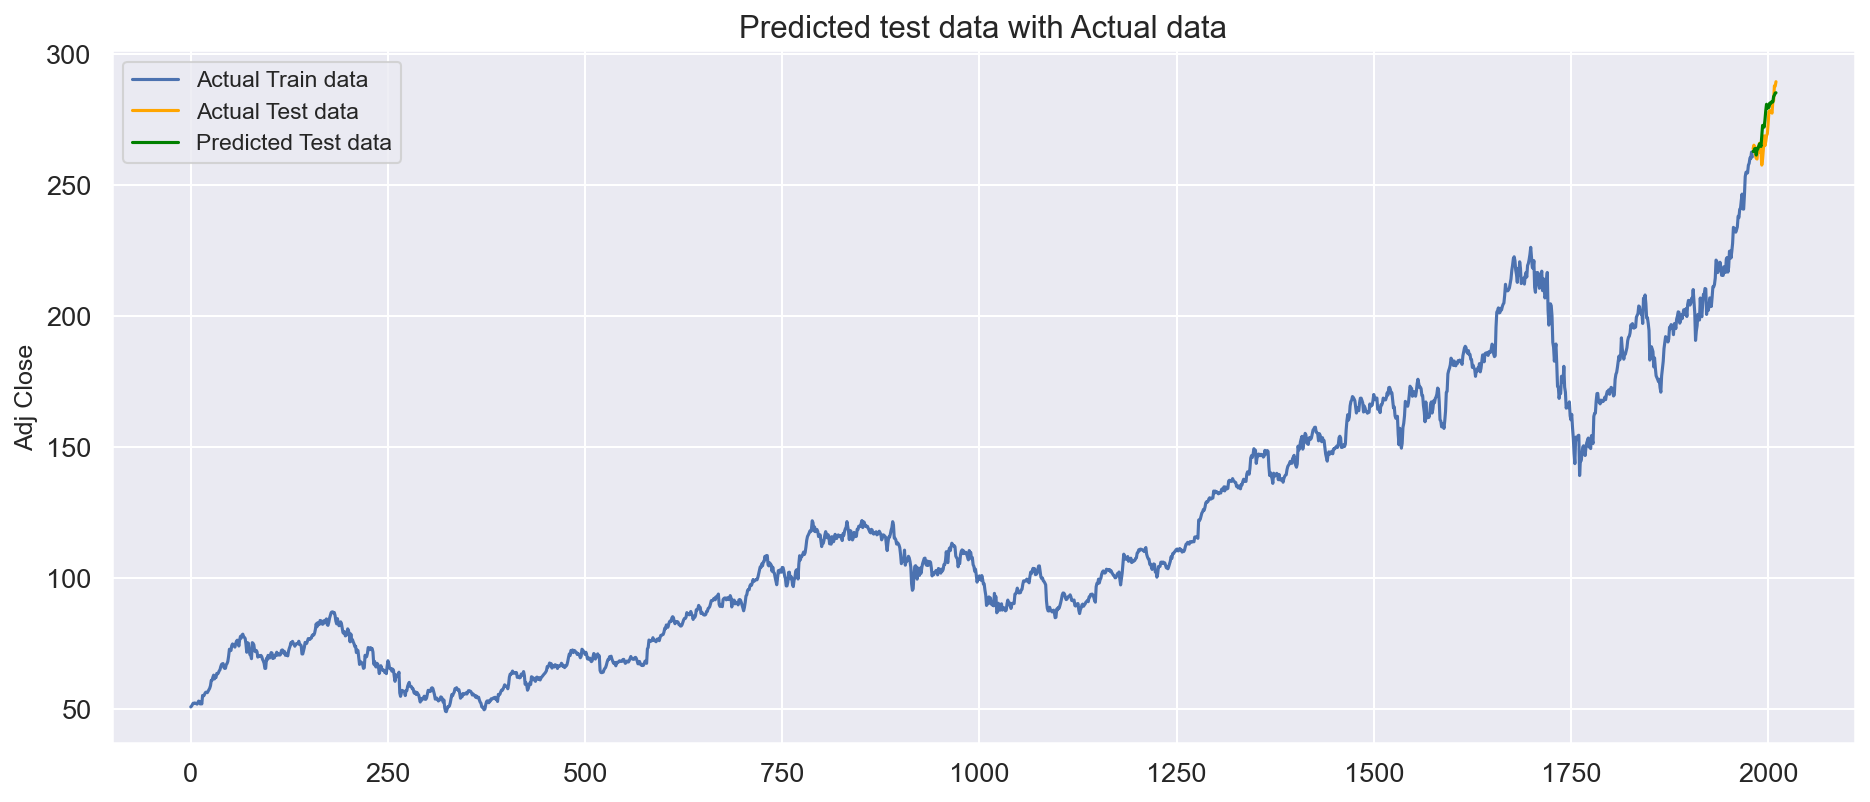

In [45]:
sns.lineplot(train, label='Actual Train data')
sns.lineplot(test, label='Actual Test data', color='orange')
sns.lineplot(pred_test, label='Predicted Test data', color='green').set_title("Predicted test data with Actual data", fontdict={'size': 15})
plt.show()

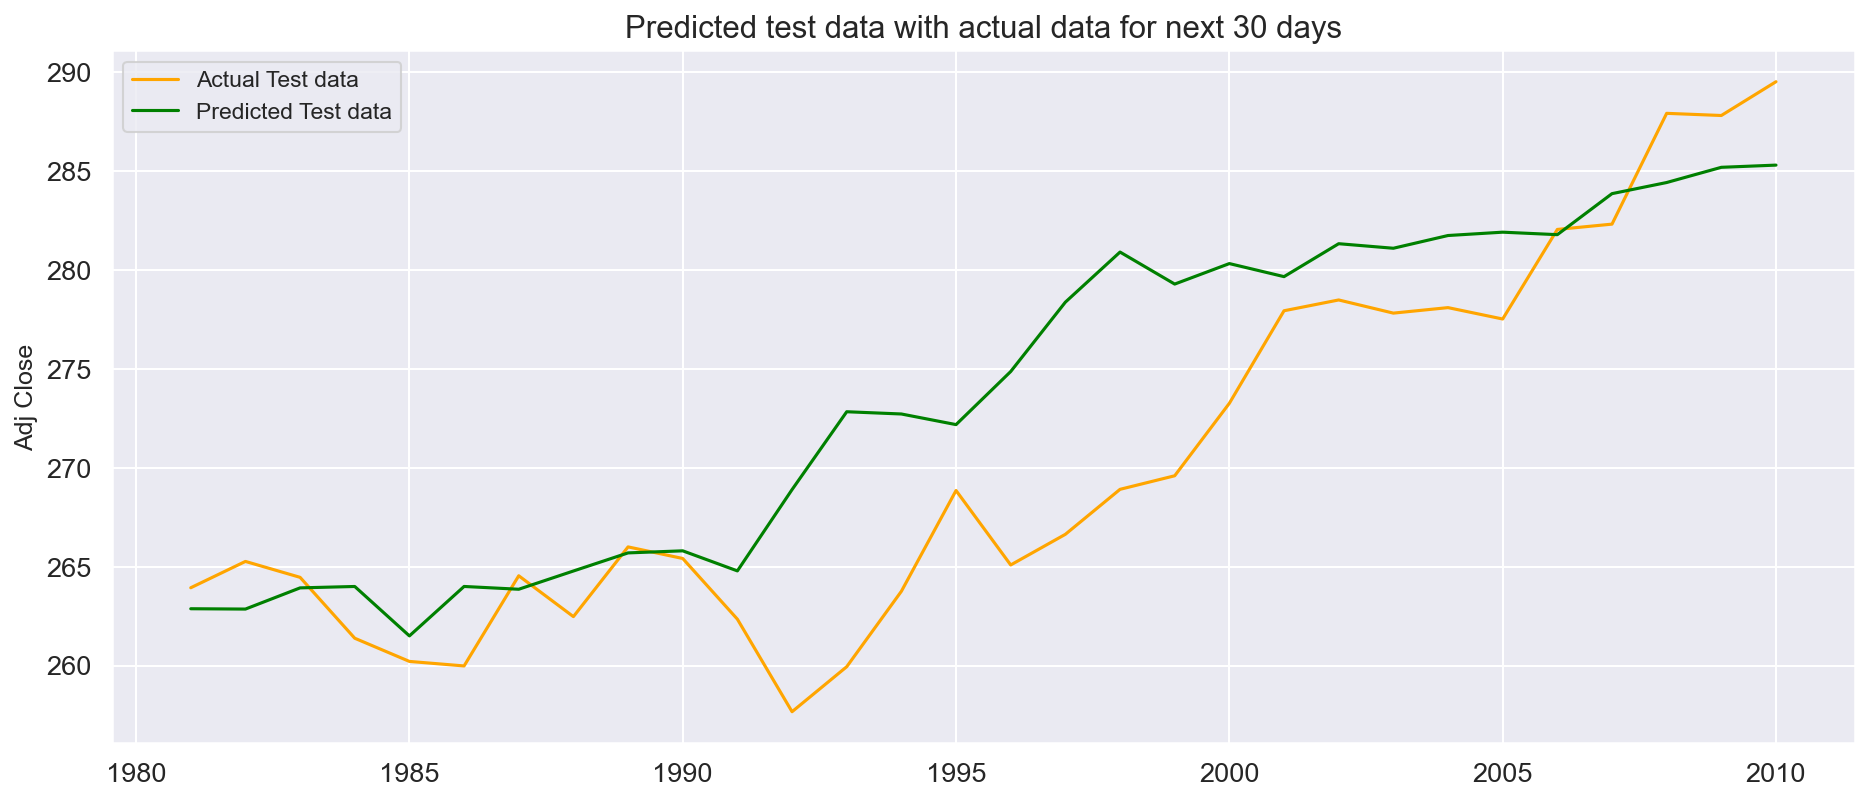

In [44]:
sns.lineplot(test, label='Actual Test data', color='orange')
sns.lineplot(pred_test, label='Predicted Test data', color='green').set_title("Predicted test data with actual data for next 30 days", fontdict={'size': 15})
plt.show()

1981    262.878181
1982    262.861174
1983    263.932621
1984    264.003474
1985    261.504937
1986    264.004227
1987    263.863590
1988    264.785818
1989    265.701115
1990    265.805822
1991    264.791024
1992    268.901249
1993    272.837291
1994    272.723855
1995    272.186739
1996    274.870920
1997    278.377953
1998    280.910453
1999    279.291631
2000    280.328054
2001    279.667773
2002    281.332719
2003    281.102705
2004    281.746720
2005    281.915593
2006    281.789672
2007    283.863428
2008    284.425833
2009    285.194949
2010    285.305930
Name: predicted_mean, dtype: float64


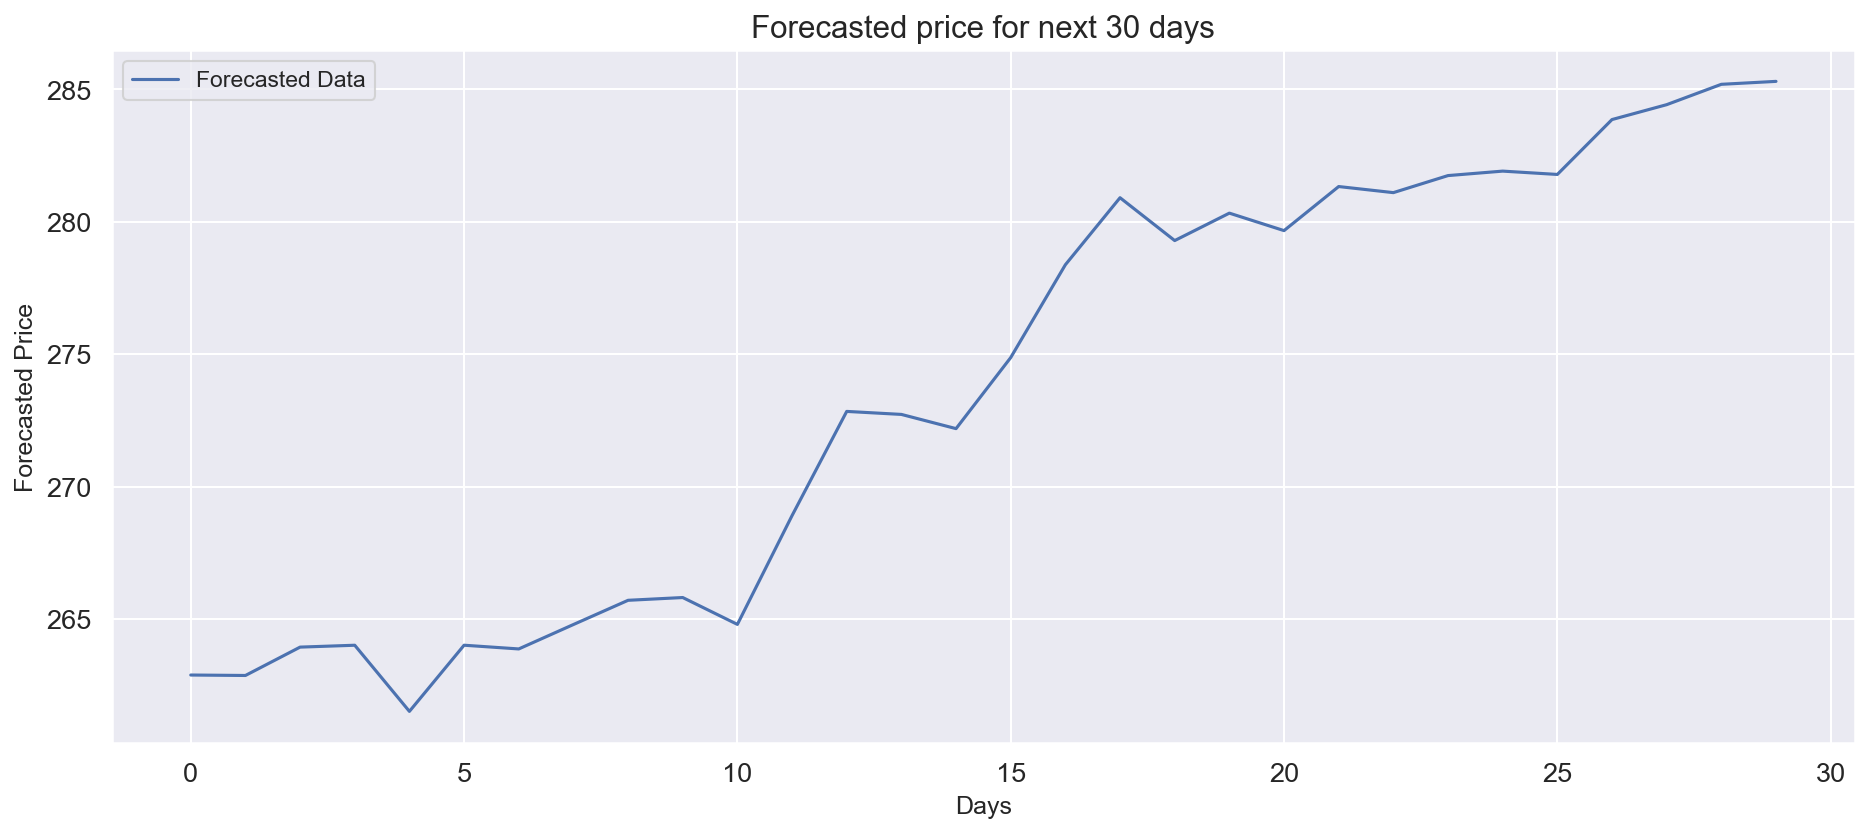

In [11]:
#Forecasting for next 30 time periods
sarima_forecast = sarima.forecast(30)
print(sarima_forecast)
chart = sns.lineplot(x=list(range(0, 30)), y=sarima_forecast, label='Forecasted Data')
chart.set_title('Forecasted price for next 30 days', size=15)
chart.set_xlabel('Days')
chart.set_ylabel('Forecasted Price')
plt.show()

### Final Model

In [13]:
final_data = apple_stk.loc[:, "Adj Close"]
final_data

0        50.765709
1        51.038536
2        51.605175
3        52.144630
4        52.061932
           ...    
2006    282.054138
2007    282.322266
2008    287.923645
2009    287.814392
2010    289.522614
Name: Adj Close, Length: 2011, dtype: float64

In [14]:
sarima = SARIMAX(fina_data, order=(2, 1, 0), seasonal_order=(2, 1, 0, 21)).fit()
final_pred = sarima.predict(start=final_data.index[0], end=final_data.index[-1])

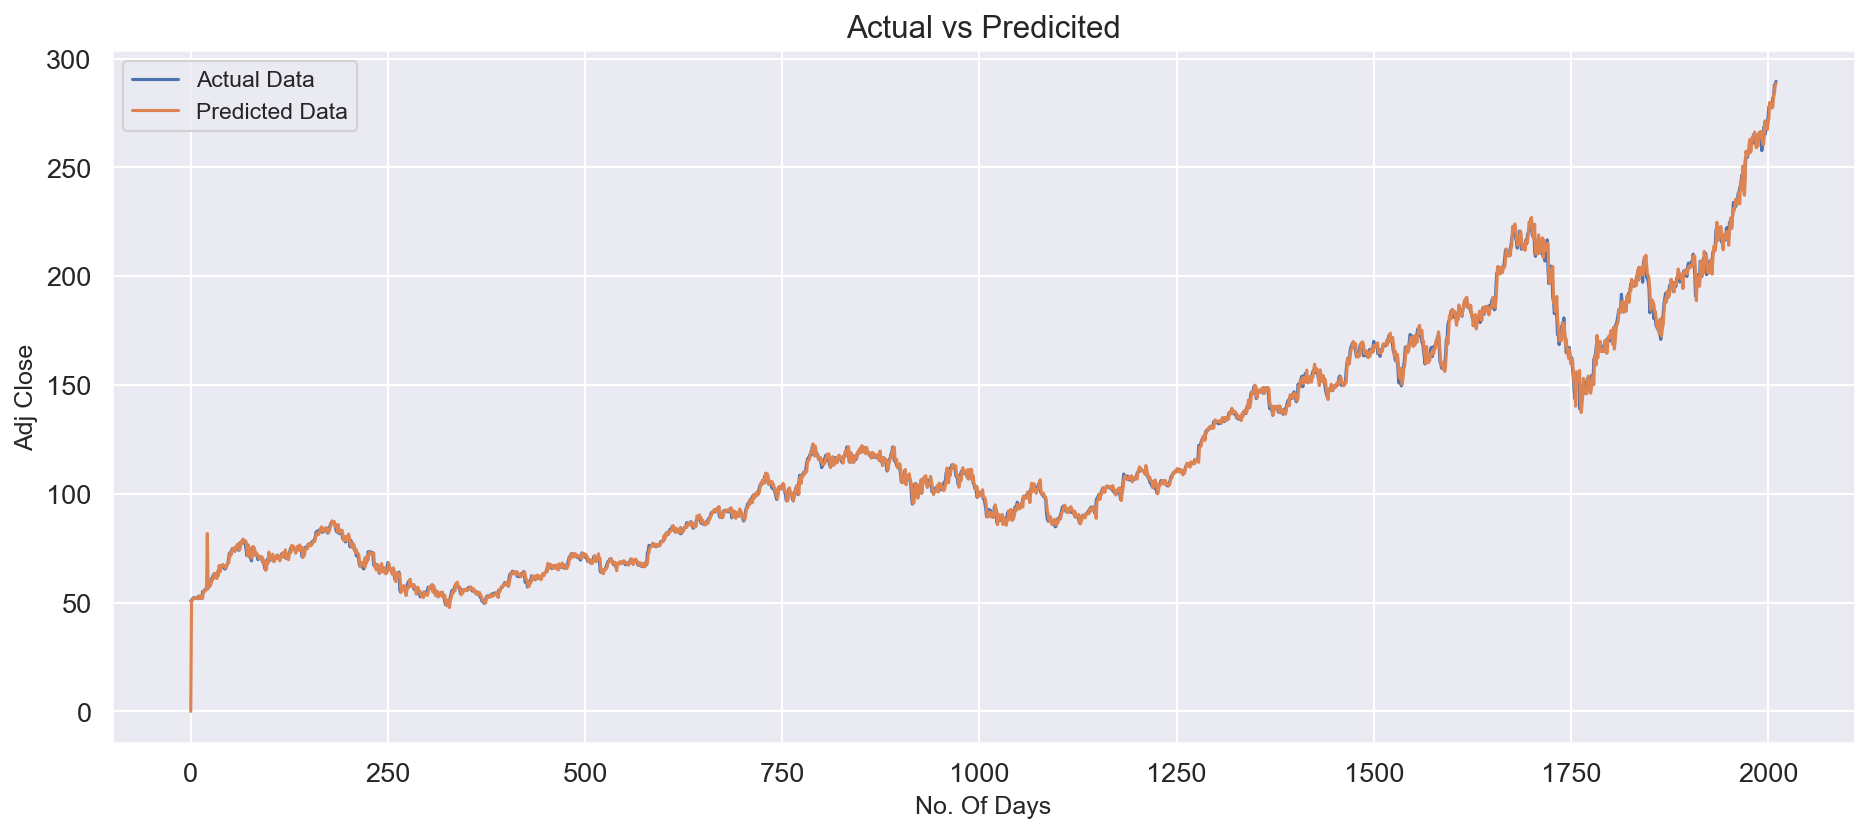

In [20]:
sns.lineplot(final_data, label='Actual Data')
chart = sns.lineplot(final_pred, label='Predicted Data')
chart.set_title('Actual vs Predicited', size=15)
chart.set_xlabel('No. Of Days')
plt.show()

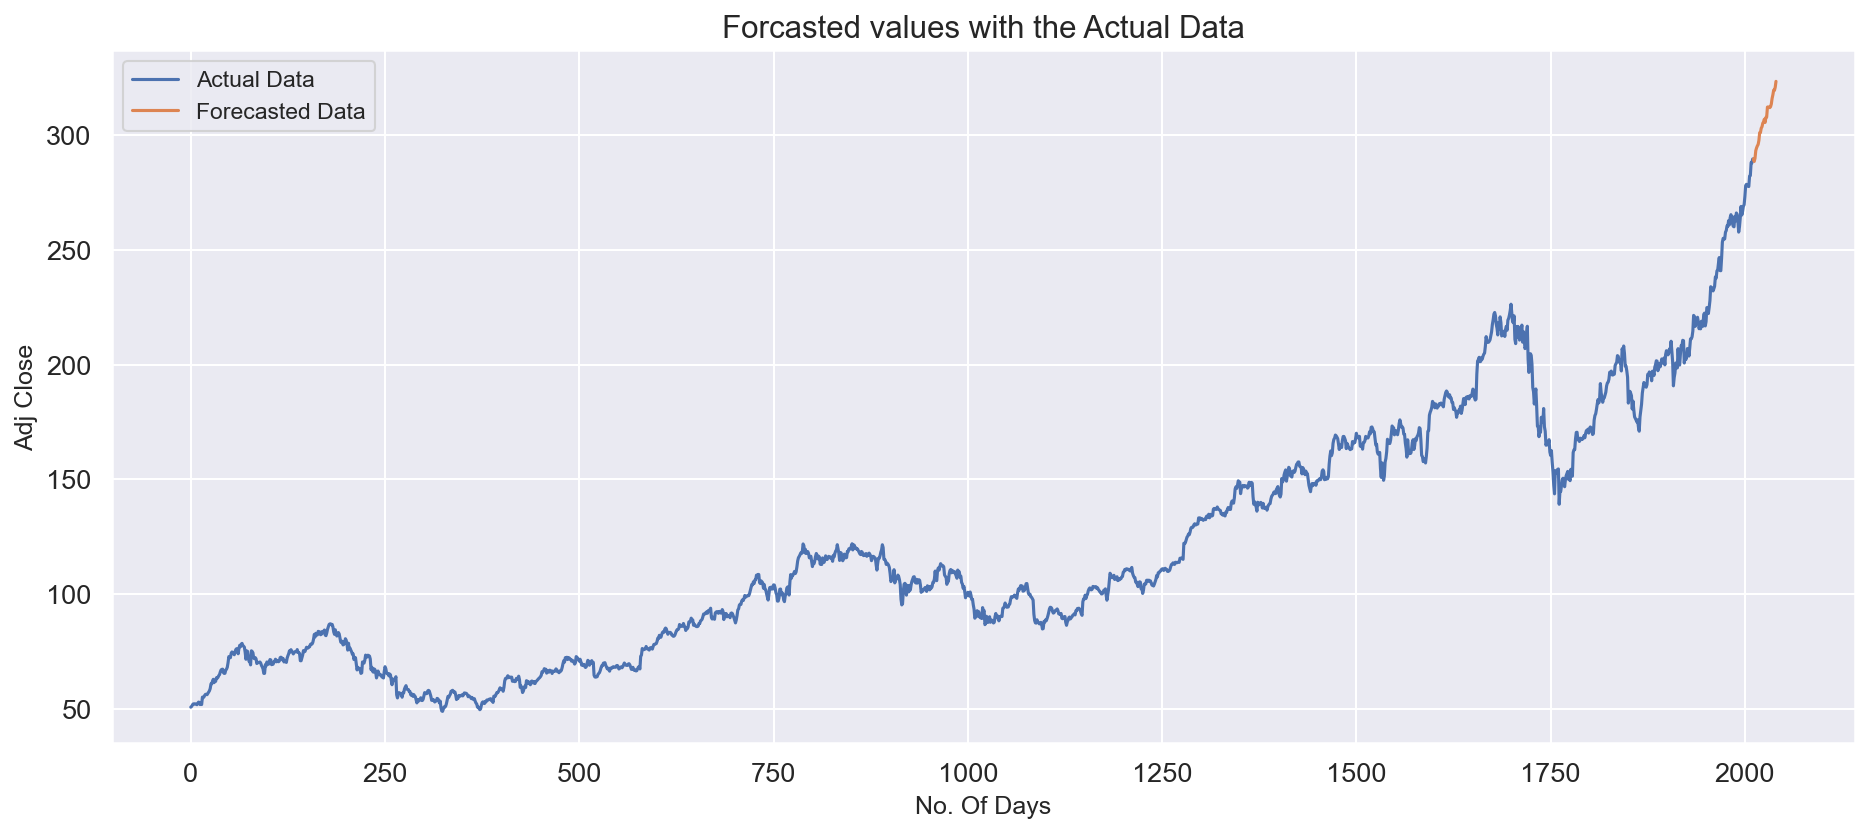

In [22]:
forecasting = sarima.forecast(30)
chart = sns.lineplot(final_data, label='Actual Data')
chart.set_title("Forcasted values with the Actual Data", size=15)
chart.set_xlabel('No. Of Days')
sns.lineplot(forecasting, label='Forecasted Data', )
plt.show()

## Saving final model to pickle file

In [24]:
with gzip.open("Final_Model_Sarima.pkl", 'wb') as f:
    pickle.dump(sarima, f)